In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import matplotlib.style as style
style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('../input/airlines-customer-satisfaction/Invistico_Airline.csv')

In [3]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [5]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [6]:
category = ["satisfaction", "Gender", "Customer Type", "Type of Travel", "Class"]
for c in category:
    print ("{} \n".format(df[c].value_counts()))

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64 

Female    65899
Male      63981
Name: Gender, dtype: int64 

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64 

Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64 

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64 



<AxesSubplot:>

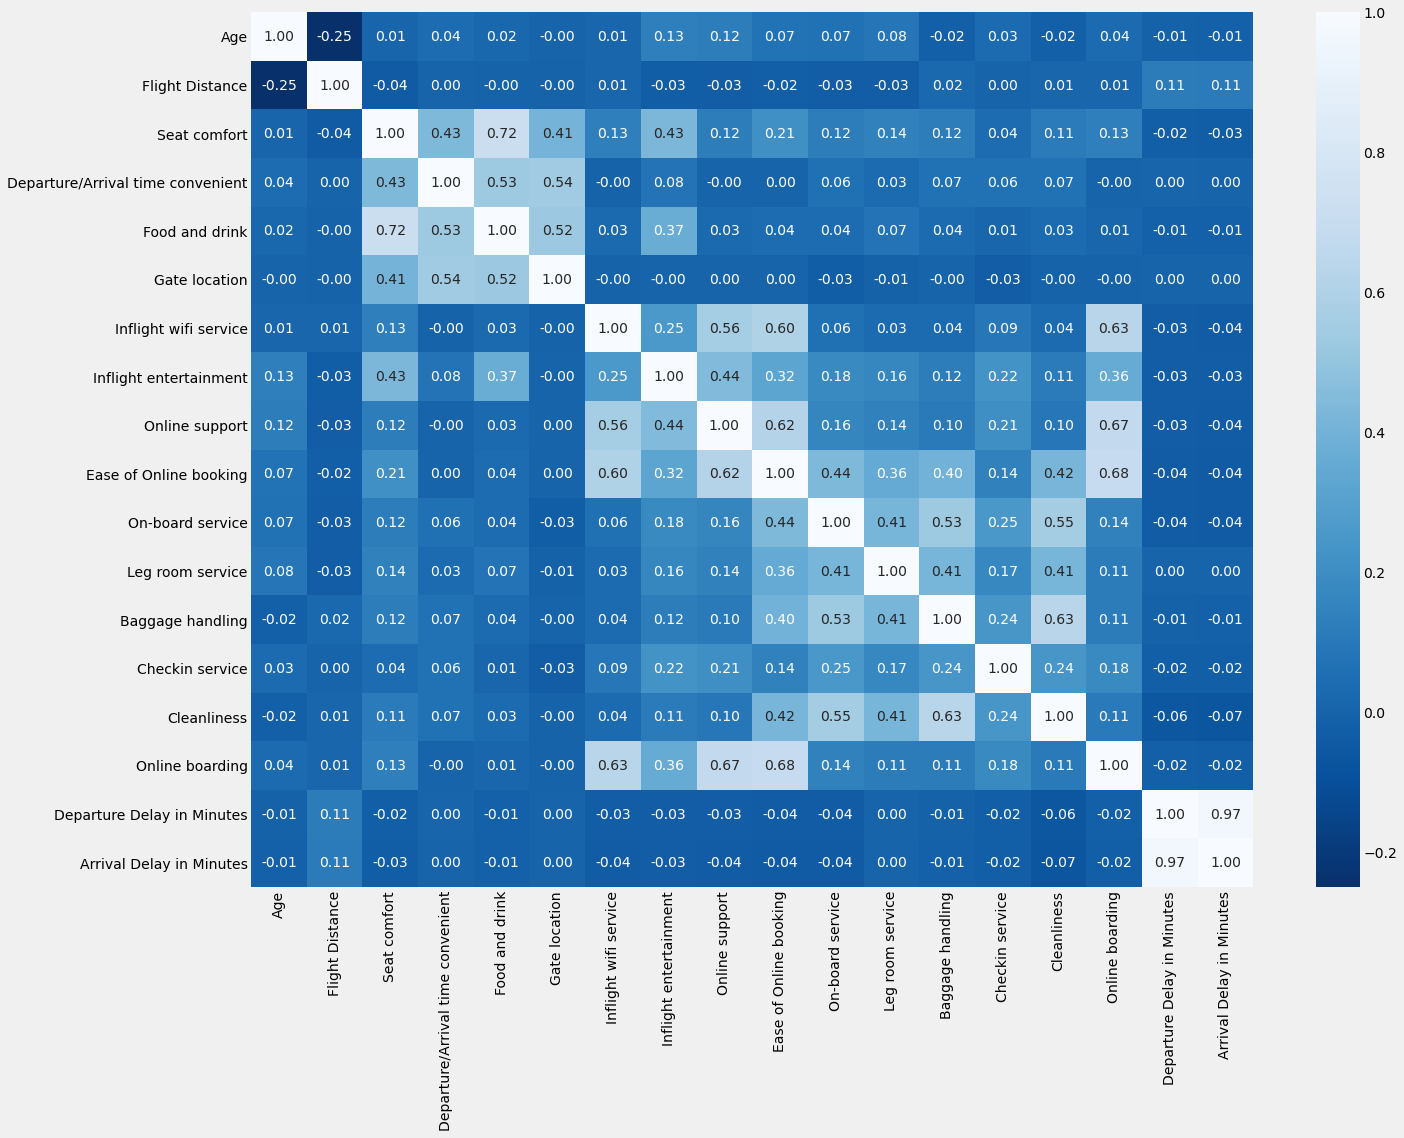

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), cmap='Blues_r', annot=True, fmt='.2f')

Food and drink feature has a strong correlation of ~0.72 with seat comfort feature and a correlation of ~0.5 with Departure/Arrival time convenient and Gate location

Food and drink has a correlation of ~0.5 with Departure/Arrival time convenient

Gate location has a correlation of ~0.5 with Departure/Arrival time convenient and Food and drink

Inflight wifi service has a correlation of ~0.5 with Online support and a correlation of ~0.6 with Ease of Online booking

Online support has a corrrelation of ~0.55 with Inflight wifi service and a correlation of ~0.6 with Ease of Online booking and Online boarding

Ease of Online booking has a correlation of ~0.6 with Inflight wifi service and Online boarding

On-board service has a correlation of ~0.5 with Baggage handling

Cleanliness has a correlation of ~0.55 with On-board service and a correlation of ~0.6 with Baggage handling

Departure Delay in Minutes has a high correlation of ~0.96 with Arrival Delay in Minutes

### Check for and Remove Outliers

In [8]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Visualizing each feature with target feature, satisfaction

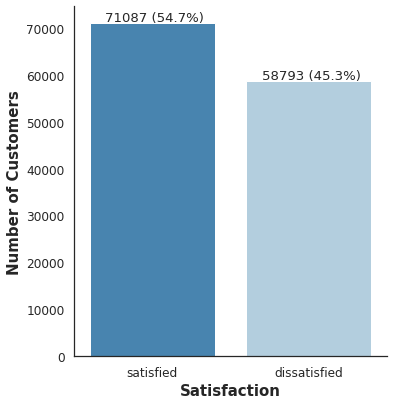

In [9]:
sns.set(style='white', font_scale=1.1)
fig = plt.figure(figsize=(5,6))
ax = sns.countplot(data=df, x='satisfaction', palette='Blues_r')
#ax.set_xticklabels(['Satisfied','Dissatisfied'])
for p in ax.patches:
    ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df)*100).round(1))+'%)',(p.get_x()+0.1,p.get_height()+400))
plt.xlabel('Satisfaction', weight='bold', fontsize=15)
plt.ylabel('Number of Customers', weight='bold', fontsize=15)
sns.despine()

#### 54.7% of customers were satistied and 45.3% dissatisfied

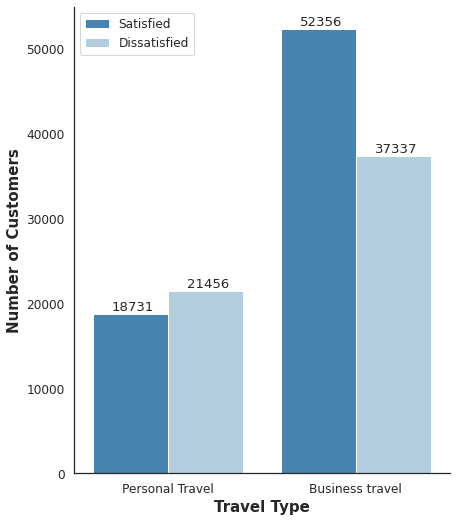

In [10]:
sns.set(style='white', font_scale=1.1)
fig = plt.figure(figsize=(6,8))
ax = sns.countplot(data=df, x='Type of Travel', palette='Blues_r', hue='satisfaction')
#ax.set_xticklabels(['Business travel','Personal travel'])
ax.legend(labels=['Satisfied','Dissatisfied'])
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+0.1,p.get_height()+400))
plt.xlabel('Travel Type', weight='bold', fontsize=15)
plt.ylabel('Number of Customers', weight='bold', fontsize=15)
sns.despine()

#### Customers on Business Travels were satisfied than those on personal travels

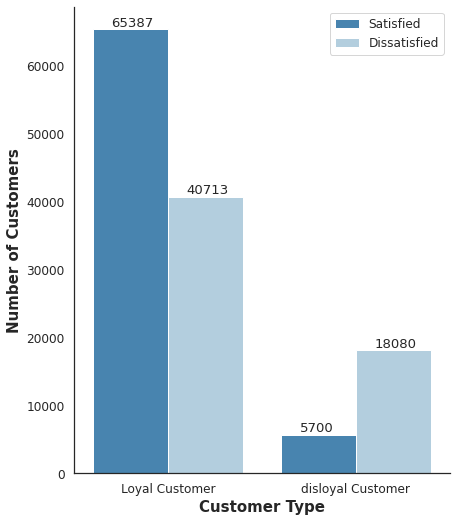

In [11]:
sns.set(style='white', font_scale=1.1)
fig = plt.figure(figsize=(6,8))
ax = sns.countplot(data=df, x='Customer Type', palette='Blues_r', hue='satisfaction')
#ax.set_xticklabels(['Disloyal Customer','Loyal Customer'])
ax.legend(labels=['Satisfied','Dissatisfied'])
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+0.1,p.get_height()+400))
plt.xlabel('Customer Type', weight='bold', fontsize=15)
plt.ylabel('Number of Customers', weight='bold', fontsize=15)
sns.despine()

#### Out of  106,100 Loyal Customers, 65,387 were satistied and 40,713 dissatisfied.  
#### Out of 23,780 disloyal Customers, 5,700 were satisfied and 18,080 dissatisfied.
#### Overall, loyal customers were more satisfied than disloyal customers

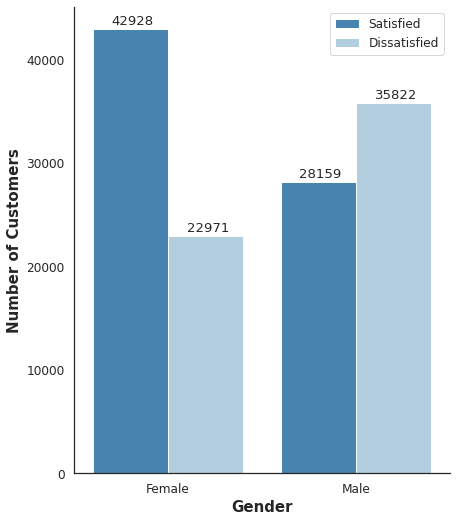

In [12]:
sns.set(style='white', font_scale=1.1)
fig = plt.figure(figsize=(6,8))
ax = sns.countplot(data=df, x='Gender', palette='Blues_r', hue='satisfaction')
#ax.set_xticklabels(['Male','Female'])
ax.legend(labels=['Satisfied','Dissatisfied'])
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+0.1,p.get_height()+400))
plt.xlabel('Gender', weight='bold', fontsize=15)
plt.ylabel('Number of Customers', weight='bold', fontsize=15)
sns.despine()

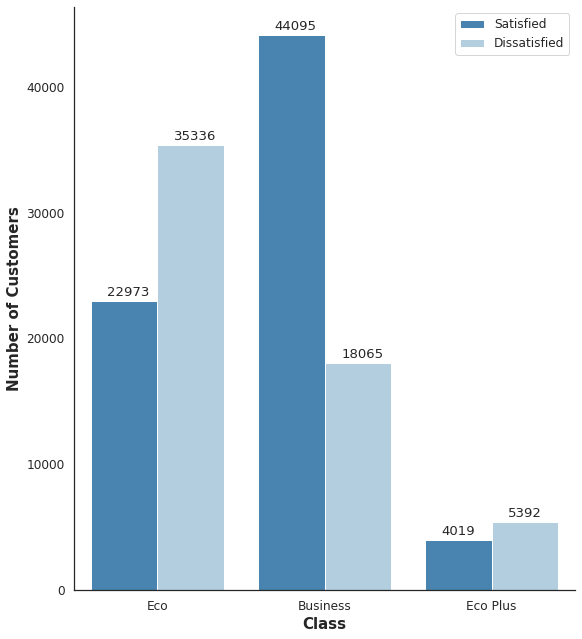

In [13]:
sns.set(style='white', font_scale=1.1)
fig = plt.figure(figsize=(8,10))
ax = sns.countplot(data=df, x='Class', palette='Blues_r', hue='satisfaction')
#ax.set_xticklabels(['Business','Eco Plus', 'Eco'])
ax.legend(labels=['Satisfied','Dissatisfied'])
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+0.1,p.get_height()+400))
plt.xlabel('Class', weight='bold', fontsize=15)
plt.ylabel('Number of Customers', weight='bold', fontsize=15)
sns.despine()